In [1]:
import os
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras import layers
from tensorflow.keras import Model
import matplotlib.pyplot as plt

In [2]:
base_dir = 'vehicle-dataset'
train_dir = os.path.join(base_dir, 'train')
validation_dir = os.path.join(base_dir, 'valid')

# Directory with our training pictures
train_vehicles_dir = os.path.join(train_dir, 'vehicles')

# Directory with our validation pictures
validation_vehicles_dir = os.path.join(validation_dir, 'vehicles')


In [3]:
# Add our data-augmentation parameters to ImageDataGenerator
train_datagen = ImageDataGenerator(
    rescale=1. / 255.,
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True
)

# Note that the validation data should not be augmented!
test_datagen = ImageDataGenerator(
    rescale=1.0 / 255.
)

In [4]:
# Flow training images in batches of 20 using train_datagen generator
train_generator = train_datagen.flow_from_directory(
    train_dir,
    batch_size=20,
    class_mode='categorical',
    target_size=(224, 224)
)

# Flow validation images in batches of 20 using test_datagen generator
validation_generator = test_datagen.flow_from_directory(
    validation_dir,
    batch_size=20,
    class_mode='categorical',
    target_size=(224, 224)
)

Found 2100 images belonging to 6 classes.
Found 900 images belonging to 6 classes.


In [5]:
from tensorflow.keras.applications import MobileNetV2
from tensorflow.keras import layers, models

# Load MobileNetV2 with pre-trained weights
base_model = MobileNetV2(weights='imagenet', include_top=False, input_shape=(224, 224, 3))

# Freeze the base model to retain pre-trained features
base_model.trainable = False

In [6]:
from keras.layers import Flatten, Dense, Dropout

model = models.Sequential([
    base_model,
    layers.GlobalAveragePooling2D(),
    layers.Dropout(0.2),
    layers.Dense(6, activation='softmax')  # Adjust for your number of classes
])

model.compile(optimizer = 'adam',
              loss = 'categorical_crossentropy',
              metrics = ['acc'])

model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ mobilenetv2_1.00_224            │ (None, 7, 7, 1280)     │     2,257,984 │
│ (Functional)                    │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ global_average_pooling2d        │ (None, 1280)           │             0 │
│ (GlobalAveragePooling2D)        │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 1280)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 6)              │         7,686 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 2,265,670 (8.64 MB)

 Trainable params: 7,686 (30.02 KB)

 Non-trainable params: 2,257,984 (8.61 MB)

In [7]:
history = model.fit(train_generator,
                    validation_data = validation_generator,
                    steps_per_epoch = 100, epochs = 10)

f:\TrainTF\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/10
100/100 ━━━━━━━━━━━━━━━━━━━━ 0s 697ms/step - acc: 0.5392 - loss: 1.2940

f:\TrainTF\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


100/100 ━━━━━━━━━━━━━━━━━━━━ 109s 951ms/step - acc: 0.5408 - loss: 1.2898 - val_acc: 0.9122 - val_loss: 0.3288
Epoch 2/10
  5/100 ━━━━━━━━━━━━━━━━━━━━ 40s 427ms/step - acc: 0.8538 - loss: 0.4958

C:\Python312\Lib\contextlib.py:158: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self.gen.throw(value)


100/100 ━━━━━━━━━━━━━━━━━━━━ 19s 186ms/step - acc: 0.8407 - loss: 0.4860 - val_acc: 0.9089 - val_loss: 0.3324
Epoch 3/10
100/100 ━━━━━━━━━━━━━━━━━━━━ 62s 617ms/step - acc: 0.8397 - loss: 0.4650 - val_acc: 0.9356 - val_loss: 0.2402
Epoch 4/10
100/100 ━━━━━━━━━━━━━━━━━━━━ 19s 187ms/step - acc: 0.8709 - loss: 0.3695 - val_acc: 0.9344 - val_loss: 0.2288
Epoch 5/10
100/100 ━━━━━━━━━━━━━━━━━━━━ 59s 587ms/step - acc: 0.8659 - loss: 0.3678 - val_acc: 0.9378 - val_loss: 0.2227
Epoch 6/10
100/100 ━━━━━━━━━━━━━━━━━━━━ 19s 187ms/step - acc: 0.8384 - loss: 0.3499 - val_acc: 0.9367 - val_loss: 0.2200
Epoch 7/10
100/100 ━━━━━━━━━━━━━━━━━━━━ 57s 573ms/step - acc: 0.8961 - loss: 0.3185 - val_acc: 0.9422 - val_loss: 0.1872
Epoch 8/10
100/100 ━━━━━━━━━━━━━━━━━━━━ 19s 185ms/step - acc: 0.9298 - loss: 0.2544 - val_acc: 0.9389 - val_loss: 0.1897
Epoch 9/10
100/100 ━━━━━━━━━━━━━━━━━━━━ 59s 589ms/step - acc: 0.8986 - loss: 0.2833 - val_acc: 0.9433 - val_loss: 0.1880
Epoch 10/10
100/100 ━━━━━━━━━━━━━━━━━━━━ 18

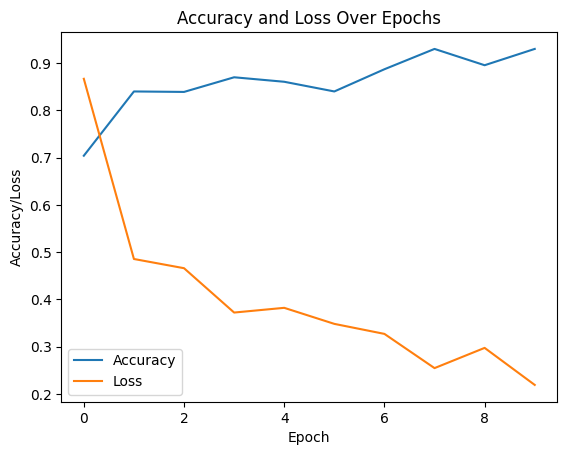

In [8]:
# Plot accuracy and loss over epochs
plt.plot(history.history['acc'], label='Accuracy')
plt.plot(history.history['loss'], label='Loss')
plt.title('Accuracy and Loss Over Epochs')
plt.xlabel('Epoch')
plt.ylabel('Accuracy/Loss')
plt.legend()
plt.show()